## Read data into Jupyter notebook, using pandas to import data into a data frame

In [1]:
import pandas as pd
import numpy as np
import os
import ast
import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json file

In [2]:
os.chdir('/Users/hp/Desktop/Datascience/TermProject')

In [3]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Datascience\\TermProject'

In [4]:
df = pd.read_csv("data (1).csv")
df['date'] = pd.to_datetime(df['date'].apply(lambda x: str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:]))

In [5]:
df.columns

Index(['channelGrouping', 'customDimensions', 'date', 'device',
       'fullVisitorId', 'geoNetwork', 'hits', 'socialEngagementType',
       'trafficSource', 'visitId', 'visitNumber', 'visitStartTime',
       'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'totals_visits'],
      dtype='object')

In [6]:
df['customDimensions'].value_counts()

[{'index': '4', 'value': 'North America'}]      9288
[{'index': '4', 'value': 'EMEA'}]               3775
[]                                              3605
[{'index': '4', 'value': 'APAC'}]               2566
[{'index': '4', 'value': 'South America'}]       468
[{'index': '4', 'value': 'Central America'}]     298
Name: customDimensions, dtype: int64

## removing all the extra characters from customDimensions

In [7]:
a=[]
for index,h in df['customDimensions'].iteritems():
    h1=h.replace('[]',"{'index': 'None', 'value': 'None'}")
    h2=h1.replace('[','')
    h3=h2.replace(']','')
    h4=ast.literal_eval(h3)
    a.append(h4)

In [8]:
customDimension = pd.Series(a)
df.drop(['customDimensions'],axis=1,inplace=True)
df1=df.merge(pd.DataFrame(customDimension), right_index=True, left_index=True)
df1=df1.rename(columns = {0:'customDimensions'})

## converting the columns of Python object datatype into json string format

In [9]:
def jsondumps(data):
    data1=ast.literal_eval(data)
    h = json.dumps(data1)
    return h
def jsondumps1(data):
    h = json.dumps(data)
    return h

In [10]:
def todict(dic, key, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key] = [value]
    return dic
def resolve_json(hitsdic, hits_json, key='NoneName'):
    if type(hits_json) == list:
        if len(hits_json) == 0:
            pass
        else:
            for subjson in hits_json:
                hitsdic = resolve_json(hitsdic, subjson)
    elif type(hits_json) == dict:
        for i in hits_json.keys():
            hitsdic = resolve_json(hitsdic, hits_json[i],i)
    else:
        hitsdic = todict(hitsdic, key, hits_json)
    return hitsdic
def complex_replace(x):
    dic = {}
    return resolve_json(dic, json.loads(x.replace('\'','\"'). \
                                        replace('TRUE','true'). \
                                        replace('True','true'). \
                                        replace('FALSE','false'). \
                                        replace('False','false'). \
                                        replace(', \"',', !&~'). \
                                        replace('\", ','!&~, '). \
                                        replace('\": ','!&~: '). \
                                        replace(': \"',': !&~'). \
                                        replace(' {\"',' {!&~'). \
                                        replace('\"}, ','!&~}, '). \
                                        replace('[{\"','[{!&~'). \
                                        replace('\"}]','!&~}]'). \
                                        replace('\"','_'). \
                                        replace('!&~','\"'). \
                                        encode('gbk','ignore'). \
                                        decode('utf-8','ignore'). \
                                        replace('\\','')))

In [11]:
len(df1['hits'].unique())

19554

## Normalized the Hits columns

In [12]:
hits_columns = json_normalize(df1['hits'].apply(complex_replace))
hits_columns

,action_type,affiliation,contentGroup1,contentGroup2,contentGroup3,contentGroup4,contentGroup5,contentGroupUniqueViews1,contentGroupUniqueViews2,contentGroupUniqueViews3,...,step,time,transactionCoupon,transactionId,transactionRevenue,transactionShipping,transactionTax,type,v2ProductCategory,v2ProductName
0,[0],NaN,[(not set)],[Bags],[(not set)],[(not set)],[(not set)],NaN,[1],NaN,...,[1],[0],NaN,NaN,NaN,NaN,NaN,[PAGE],"[Home/Drinkware/Water Bottles and Tumblers/, H...","[Google 17oz Stainless Steel Sport Bottle, 26 ..."
1,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,NaN,NaN,...,"[1, 1]","[0, 27844]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[(not set), (not set), (not set), (not set), (...",[Google Men_s 100% Cotton Short Sleeve Hero Te...
2,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Apparel]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 38153]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Apparel/Kid_s/, Home/Apparel/Kid_s/, Hom...","[Google Toddler Short Sleeve Tee Red, Google Y..."
3,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Brands]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 1087]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Shop by Brand/YouTube/, Home/Shop by Bra...","[YouTube Custom Decals, 22 oz YouTube Bottle I..."
4,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Apparel]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 52349]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[(not set), (not set)]",[Google Women_s Short Sleeve Hero Tee Sky Blue...
5,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Apparel]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 12090]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Apparel/Headgear/, Home/Apparel/Headgear/]","[Google Twill Cap, Google Blackout Cap]"
6,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Electronics]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 9424]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Electronics/Electronics Accessories/, Ho...","[Recycled Mouse Pad, Google Device Stand, Waze..."
7,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Apparel]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 14759]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]",[(not set)],[Google Men_s 100% Cotton Short Sleeve Hero Te...
8,"[0, 0]",NaN,"[(not set), (not set)]","[(not set), Electronics]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 33741]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Electronics/Electronics Accessories/, Ho...","[Google Device Stand, Waze Mobile Phone Vent M..."
9,"[0, 0]",NaN,"[(not set), (not set)]","[Apparel, (not set)]","[(not set), (not set)]","[(not set), (not set)]","[(not set), (not set)]",NaN,[1],NaN,...,"[1, 1]","[0, 32348]",NaN,NaN,NaN,NaN,NaN,"[PAGE, PAGE]","[Home/Apparel/, Home/Apparel/, Home/Apparel/, ...",[Google Men_s 100% Cotton Short Sleeve Hero Te...


In [13]:
hits_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 87 columns):
action_type                       19994 non-null object
affiliation                       196 non-null object
contentGroup1                     19994 non-null object
contentGroup2                     19994 non-null object
contentGroup3                     19994 non-null object
contentGroup4                     19994 non-null object
contentGroup5                     19994 non-null object
contentGroupUniqueViews1          1381 non-null object
contentGroupUniqueViews2          11814 non-null object
contentGroupUniqueViews3          1749 non-null object
currencyCode                      11914 non-null object
dataSource                        11214 non-null object
domContentLoadedTime              222 non-null object
domInteractiveTime                222 non-null object
domLatencyMetricsSample           222 non-null object
domainLookupTime                  161 non-null object
eventAc

### chose the best possible columns form hits_columns for the prediction and preprocessed the columns of our interset. Added the values in the list and formed a single value.

In [14]:
e = []
h=pd.DataFrame(hits_columns)
for i,r in h['affiliation'].iteritems():
    if isinstance(r,list):
        r1=r[0]
        e.append(r1)
    else:
        e.append(0)
e1 = pd.Series(e, name='affiliation')

In [15]:
sum1=0
e2= []
for i,r in h['localProductRevenue'].iteritems():
    if isinstance(r,list):
        for a in r:
            sum1 = sum1 + int(a)
        e2.append(sum1)
        sum1=0
    else:
        e2.append(0)
e2=pd.Series(e2, name='localProductRevenue')

In [16]:
sum1=0
e3= []
for i,r in h['productRevenue'].iteritems():
    if isinstance(r,list):
        for a in r:
            sum1 = sum1 + int(a)
        e3.append(sum1)
        sum1=0
    else:
        e3.append(0)
e3=pd.Series(e3, name='productRevenue')

In [17]:
sum1=0
e4= []
for i,r in h['transactionRevenue'].iteritems():
    if isinstance(r,list):
        for a in r:
            sum1 = sum1 + int(a)
        e4.append(sum1)
        sum1=0
    else:
        e4.append(0)
e4=pd.Series(e4, name='transactionRevenue')
e4[4639]

675960000

In [18]:
sum1=0
e5= []
for i,r in h['transactionShipping'].iteritems():
    if isinstance(r,list):
        for a in r:
            sum1 = sum1 + int(a)
        e5.append(sum1)
        sum1=0
    else:
        e5.append(0)
e5=pd.Series(e5, name='transactionShipping')

### converted the below columns from object to json string

In [19]:
h1=df1['customDimensions'].apply(jsondumps1)
h2=df1['trafficSource'].apply(jsondumps)
h3=df1['geoNetwork'].apply(jsondumps)
h4=df1['device'].apply(jsondumps)

In [20]:
df1.drop(['customDimensions', 'device', 'geoNetwork','trafficSource'],axis=1,inplace=True)
df1=df1.merge(pd.DataFrame(h1), right_index=True, left_index=True)
df1=df1.merge(pd.DataFrame(h2), right_index=True, left_index=True)
df1=df1.merge(pd.DataFrame(h3), right_index=True, left_index=True)
df1=df1.merge(pd.DataFrame(h4), right_index=True, left_index=True)

In [21]:
df1.head()
df1.to_csv('data2.csv')

### for the below mentioned columns converted the json sting, normalized and put in df

In [22]:
columns = ['device', 'geoNetwork', 'customDimensions', 'trafficSource'] # Columns that have json format

#dir_path = "/Users/hp/Desktop/Datascience/TermProject/" # you can change to your local 

#Code to transform the json format columns in table
def json_read(csv_path='/Users/hp/Desktop/Datascience/TermProject/data2.csv', nrows=None):
    #joining the [ path + df received]
    #data_frame = dir_path + df
    
    #Importing the dataset
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'},
                     nrows=nrows) # transforming this column to string
    for column in columns:        #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df # returning the df after importing and transforming

In [23]:
df1 = json_read() 
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'hits',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'totals_visits', 'device.browser',
       'device.browserSize', 'device.browserVersion', 'device.deviceCategory',
       'device.flashVersion', 'device.isMobile', 'device.language',
       'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.screenColors',
       'device.screenResolution', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoN

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 60 columns):
channelGrouping                                      20000 non-null object
date                                                 20000 non-null object
fullVisitorId                                        20000 non-null object
hits                                                 20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
totals_bounces                                       9873 non-null float64
totals_hits                                          20000 non-null int64
totals_newVisits                                     15088 non-null float64
totals_pageviews                                     19999 non-null f

In [25]:
result = pd.concat([e1, e2, e3, e4,e5], axis=1)
result

,affiliation,localProductRevenue,productRevenue,transactionRevenue,transactionShipping
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


Added all the columns of our interset into single DF

In [26]:
df1 = pd.concat([df1, result], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 65 columns):
channelGrouping                                      20000 non-null object
date                                                 20000 non-null object
fullVisitorId                                        20000 non-null object
hits                                                 20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
totals_bounces                                       9873 non-null float64
totals_hits                                          20000 non-null int64
totals_newVisits                                     15088 non-null float64
totals_pageviews                                     19999 non-null f

In [27]:
df1.drop(['hits'],axis=1,inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 64 columns):
channelGrouping                                      20000 non-null object
date                                                 20000 non-null object
fullVisitorId                                        20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
totals_bounces                                       9873 non-null float64
totals_hits                                          20000 non-null int64
totals_newVisits                                     15088 non-null float64
totals_pageviews                                     19999 non-null float64
totals_sessionQualityDim                             9120 non-null f

### Preprocess data: Explore data, check for missing data and imputing nan values with 0

In [29]:

def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    print("\n Total of Sales % of Total: ", round((df1[df1['totals_transactionRevenue'] != np.nan]['totals_transactionRevenue'].count() / len(df1['totals_transactionRevenue']) * 100),4))
    
    return 

In [30]:
missing_values(df1)

Total columns at least one Values: 
                                              Total  Percent
totals_transactionRevenue                     19807   99.035
totals_totalTransactionRevenue                19807   99.035
totals_transactions                           19804   99.020
trafficSource.adContent                       19479   97.395
trafficSource.adwordsClickInfo.slot           19370   96.850
trafficSource.adwordsClickInfo.adNetworkType  19370   96.850
trafficSource.adwordsClickInfo.page           19370   96.850
trafficSource.adwordsClickInfo.isVideoAd      19370   96.850
trafficSource.adwordsClickInfo.gclId          19367   96.835
trafficSource.referralPath                    13896   69.480
trafficSource.isTrueDirect                    13667   68.335
trafficSource.keyword                         13210   66.050
totals_sessionQualityDim                      10880   54.400
totals_bounces                                10127   50.635
totals_timeOnSite                              98

Nice. We can see that we have: 
Our target have just 0.965% of non-null values 
9 columns with 95%+ of missing values 
5 columns with 50%+ of missing values 
2 column with less than 50%
1 column with less than 1%


In [31]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### Checking for the constant columns i.e all the rows with single value and dropping them from the Data frame as they hold very less significance for the predictions.

In [32]:
const_cols = [c for c in df1.columns if df1[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'totals_visits',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [33]:
df1.drop(['socialEngagementType',
 'totals_visits',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'trafficSource.adwordsClickInfo.criteriaParameters'],axis=1,inplace=True)

In [34]:
df1.fillna(0, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
channelGrouping                                 20000 non-null object
date                                            20000 non-null object
fullVisitorId                                   20000 non-null object
visitId                                         20000 non-null int64
visitNumber                                     20000 non-null int64
visitStartTime                                  20000 non-null int64
totals_bounces                                  20000 non-null float64
totals_hits                                     20000 non-null int64
totals_newVisits                                20000 non-null float64
totals_pageviews                                20000 non-null float64
totals_sessionQualityDim                        20000 non-null float64
totals_timeOnSite                               20000 non-null float64
totals_totalTransactionRevenue                  20

#### Looked for the significant columns for the predictions and dropped the remaining from the data frame

In [35]:
df1.drop(['date','visitId','fullVisitorId','visitNumber','visitStartTime','totals_timeOnSite','device.browser',                                  
'device.deviceCategory',                           
'device.isMobile',                                 
'device.operatingSystem',                          
'geoNetwork.city',                                 
'geoNetwork.continent',                            
'geoNetwork.country',                              
'geoNetwork.metro',                                
'geoNetwork.networkDomain',                        
'geoNetwork.region',                               
'geoNetwork.subContinent','customDimensions.index','trafficSource.adContent',                         
'trafficSource.adwordsClickInfo.adNetworkType',    
'trafficSource.adwordsClickInfo.gclId',            
'trafficSource.adwordsClickInfo.isVideoAd',        
'trafficSource.adwordsClickInfo.page',             
'trafficSource.adwordsClickInfo.slot',             
'trafficSource.campaign',                          
'trafficSource.isTrueDirect',                      
'trafficSource.keyword',                           
'trafficSource.medium',                            
'trafficSource.referralPath',                      
'trafficSource.source'],axis=1,inplace=True)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
channelGrouping                   20000 non-null object
totals_bounces                    20000 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  20000 non-null float64
totals_pageviews                  20000 non-null float64
totals_sessionQualityDim          20000 non-null float64
totals_totalTransactionRevenue    20000 non-null float64
totals_transactionRevenue         20000 non-null float64
totals_transactions               20000 non-null float64
customDimensions.value            20000 non-null object
affiliation                       20000 non-null object
localProductRevenue               20000 non-null int64
productRevenue                    20000 non-null int64
transactionRevenue                20000 non-null int64
transactionShipping               20000 non-null int64
dtypes: float64(7), int64(5), object(3)
memory us

In [37]:
df1['affiliation'].value_counts()
df1['affiliation'].replace(["Google Merchandise Store"], 1, inplace=True)

#### Encoding the categorical columns into numerical values using the get dummies function which by default follows the one hot encoding

In [38]:
df1['channelGrouping','customDimensions.value'] = df1.index
df1 = pd.get_dummies(df1, columns=['channelGrouping','customDimensions.value'])

In [39]:
df1.drop(df1.columns[13], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
totals_bounces                            20000 non-null float64
totals_hits                               20000 non-null int64
totals_newVisits                          20000 non-null float64
totals_pageviews                          20000 non-null float64
totals_sessionQualityDim                  20000 non-null float64
totals_totalTransactionRevenue            20000 non-null float64
totals_transactionRevenue                 20000 non-null float64
totals_transactions                       20000 non-null float64
affiliation                               20000 non-null int64
localProductRevenue                       20000 non-null int64
productRevenue                            20000 non-null int64
transactionRevenue                        20000 non-null int64
transactionShipping                       20000 non-null int64
channelGrouping_Affiliates                20000 non-null u

# Part 1: 
In your project you have been working with a bias dataset. Most probabely suupervised models were underfit. You should remember that this is a real dataset, and in real life most of the time you dont have access to clean and unbias dataset. In situations like this, none of the regression models will have a good fit for the dataset due to the large predence of the 0s. In the first part of this take-home exam, you are asked to be creative, and find a solution for this problem. 

For this dataset, you can break the problem, into a two-step machine learning model. 

First step is to classify the data points as positive revenue and zero revenue. This simply is a binary classification. You should remember that when you are dealing with biased datasets, accuracy is not a reliable scoring metric. So look for a robust scoring function. 

Next, you need to build a regression model to postprocess classification results. Here is a flow chart to show you the outline of the model. 

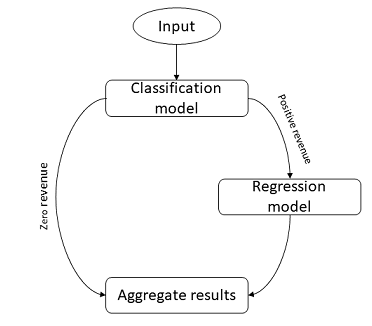

In [40]:
from sklearn.model_selection import train_test_split #training and testing data split

#### Spliting dataset into train and test dataset.

In [103]:
from sklearn.preprocessing import MinMaxScaler  #This transformation is often used as an alternative to zero mean, unit variance scaling.
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
Y =  df1['totals_transactionRevenue']
Y1 = Y
X = df1.drop(['totals_transactionRevenue'], axis = 1)
X = scaler.fit_transform(X)
X2 = X
Y=Y.astype(bool).astype(int)
Y2 = Y
Y.value_counts()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X.shape)
print(Y.shape)

(20000, 25)
(20000,)


### Above coverting the target column Total_transactionrevenue continous values to 1

# Classification 

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import metrics #accuracy measure
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

model=RandomForestClassifier(n_estimators=135,max_depth=8,random_state=1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction1,y_test))
cross_val_score(model, X, Y, cv=5).mean()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The accuracy of the Random Forests is 1.0


0.9998000249875016

In [44]:
prediction2=model.predict(X)
print('The accuracy of the Random Forests on whole dataset is',metrics.accuracy_score(prediction2,Y))

The accuracy of the Random Forests on whole dataset is 1.0


### Checking the F-1 score through the confusion matrix

In [45]:
cm = confusion_matrix(y_test, prediction1)
print(cm)

[[6537    0]
 [   0   63]]


#### Visually the above doesn’t easily convey how is our classifier performing, but we mainly focus on the top right and bottom left (these are the errors or misclassifications).

#### The confusion matrix tells us we a have total of 0(0 + 0) misclassified data.

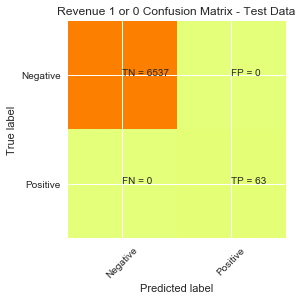

In [46]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Revenue 1 or 0 Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [47]:
Precision = 63/63+0
Recall = 63/63+0

F1Score = 2*(Recall * Precision) / (Recall + Precision)
F1Score

1.0

# Regression model

In [48]:
import copy
df2 = copy.deepcopy(df1)
df2

,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,affiliation,localProductRevenue,...,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,customDimensions.value_APAC,customDimensions.value_Central America,customDimensions.value_EMEA,customDimensions.value_None,customDimensions.value_North America,customDimensions.value_South America
0,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.0,2,0.0,2.0,2.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.0,2,1.0,2.0,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,2,1.0,2.0,1.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.0,2,1.0,2.0,1.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0.0,2,1.0,2.0,2.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0.0,2,1.0,2.0,1.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,0.0,2,1.0,2.0,1.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,0.0,2,1.0,2.0,1.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
9,0.0,2,0.0,2.0,1.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [49]:
df2 = df2[df2['totals_transactionRevenue'] > 0]
df2

,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,affiliation,localProductRevenue,...,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,customDimensions.value_APAC,customDimensions.value_Central America,customDimensions.value_EMEA,customDimensions.value_None,customDimensions.value_North America,customDimensions.value_South America
433,0.0,9,0.0,9.0,13.0,17190000.0,15190000.0,1.0,1,17190000,...,1,0,0,0,0,0,0,0,1,0
550,0.0,15,0.0,12.0,38.0,13000000.0,8000000.0,1.0,1,13000000,...,0,0,1,0,0,0,0,0,1,0
555,0.0,15,0.0,15.0,42.0,65300000.0,57300000.0,1.0,1,65299998,...,1,0,0,0,0,0,0,0,1,0
597,0.0,18,0.0,16.0,77.0,25230000.0,18230000.0,1.0,1,25230000,...,0,0,1,0,0,0,0,0,1,0
619,0.0,21,1.0,20.0,62.0,16310000.0,12310000.0,1.0,1,16310000,...,0,0,1,0,0,0,0,0,1,0
634,0.0,23,0.0,21.0,68.0,51000000.0,44000000.0,1.0,1,51000000,...,0,0,1,0,0,0,0,0,1,0
650,0.0,25,1.0,17.0,48.0,46000000.0,42000000.0,1.0,1,46000000,...,1,0,0,0,0,0,0,0,1,0
654,0.0,27,1.0,23.0,66.0,22980000.0,15980000.0,1.0,1,22980000,...,0,0,1,0,0,0,0,0,1,0
657,0.0,28,1.0,23.0,82.0,44940000.0,42940000.0,1.0,1,44940000,...,0,0,1,0,0,0,0,0,1,0
659,0.0,28,1.0,22.0,48.0,16690000.0,10690000.0,1.0,1,16690000,...,1,0,0,0,0,0,0,0,1,0


In [69]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
Y =  df2['totals_transactionRevenue']
X = df2.drop(['totals_transactionRevenue'], axis = 1)
X1 = X
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X.shape
Y.shape

(193,)

## Random Forest regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=500)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
predict1 = regr.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, predict1)
print(r2_score(y_test,predict1))

0.91109597137352


In [53]:
print(np.sqrt(mse))

51596860.50428776


#### Now predicting on the whole dataset

In [54]:
predict2 = regr.predict(X)
mse = mean_squared_error(Y, predict2)
print(r2_score(Y,predict2))
print(np.sqrt(mse))

0.9585340226362681
34769823.38435234


In [55]:
x1 = pd.DataFrame(predict2)
x1.index = X1.index
x1

,0
433,1.394190e+07
550,7.793384e+06
555,5.719132e+07
597,1.833694e+07
619,1.099720e+07
634,4.338528e+07
650,4.218111e+07
654,1.636758e+07
657,4.236895e+07
659,1.080699e+07


## Steps followed to perform aggregation on the two results : classification and regression

In [56]:
Y1 = Y1.drop(Y1.index[list(x1.index)])

In [57]:
Y1 = pd.DataFrame(Y1)

In [58]:
result = pd.concat([Y1, x1])
Result = pd.DataFrame(result[0])
Result = Result.fillna(0)

In [59]:
Result

,0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,0.000000e+00
6,0.000000e+00
7,0.000000e+00
8,0.000000e+00
9,0.000000e+00


In [60]:
df3 = copy.deepcopy(df1)
newdf = pd.concat([df3,Result], axis=1)

In [61]:
newdf = newdf[['totals_transactionRevenue',0]]
newdf.rename(columns={0: 'CombinedTarget'}, inplace=True)
newdf

,totals_transactionRevenue,CombinedTarget
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


# Aggregating the result

In [62]:
mse = mean_squared_error(newdf['totals_transactionRevenue'], newdf['CombinedTarget'])
print(r2_score(newdf['totals_transactionRevenue'], newdf['CombinedTarget']))
print(np.sqrt(mse))

0.9704201225465278
3415593.208423374


# Part 2
In this part you will create a Python function ``plot_decision_boundary`` that will accepts a machine learning model, feature set ``X``, and target set ``y`` as input and will plot the decision boundary of the input machine learning model  on ``(X,y)``. The following is a sample run of this function: 

Sample output: 
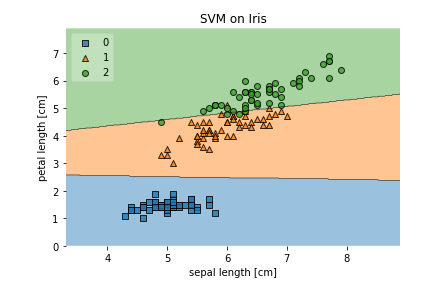

In [93]:
def plot_decision_boundary(X, y, model_class, **model_params):
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .03    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9)
    return plt


Text(0.5,1,'SVM on Iris')

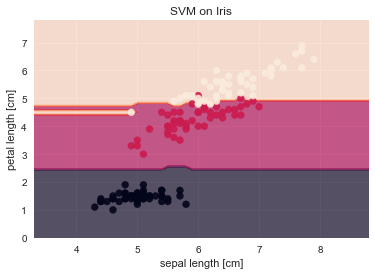

In [98]:
%matplotlib inline
from sklearn import datasets
from sklearn.svm import SVC


# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
#svm = SVC(C=0.5, kernel='linear')
#svm.fit(X, y)

# Plotting decision boundary
plot_decision_boundary(X, y, RandomForestClassifier)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')

#### Plotting decision boundary on dataset used by me for classification, we can see from below as the dataset is highly biased the decision boundary can't perfectly explain the classification of data. also we have just two target 0,1 so a single decision boundary.

Text(0.5,1,'KNeighborsClassifier on our dataset')

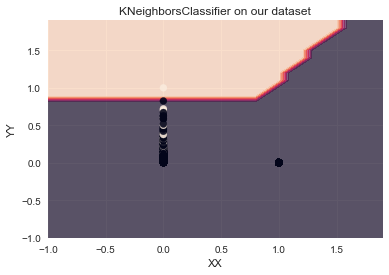

In [99]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier #KNN


# Plotting decision boundary
plot_decision_boundary(X2, Y2, KNeighborsClassifier)

# Adding axes annotations
plt.xlabel('XX')
plt.ylabel('YY')
plt.title('KNeighborsClassifier on our dataset')

Text(0.5,1,'LogisticRegression on our dataset')

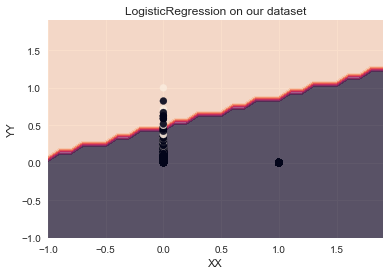

In [100]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression


# Plotting decision boundary
plot_decision_boundary(X2, Y2, LogisticRegression)

# Adding axes annotations
plt.xlabel('XX')
plt.ylabel('YY')
plt.title('LogisticRegression on our dataset')

Text(0.5,1,'RandomForestClassifier on our dataset')

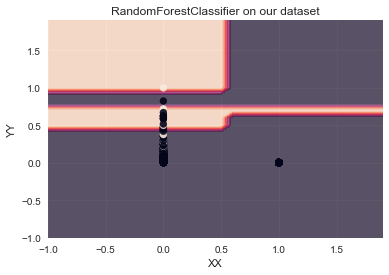

In [101]:
%matplotlib inline

# Plotting decision boundary
plot_decision_boundary(X2, Y2, RandomForestClassifier)

# Adding axes annotations
plt.xlabel('XX')
plt.ylabel('YY')
plt.title('RandomForestClassifier on our dataset')